In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [64]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


# 2. Exploratory Data Analysis


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [66]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Let us now check the missing values in the dataset

In [67]:
data.isnull().sum().sum()

0

In [68]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### The only non-transformed variables to work with are:
- `Time`
- `Amount`
- `Class` (1: fraud, 0: not_fraud)

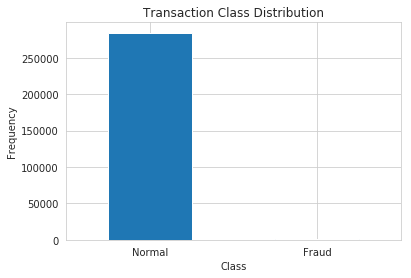

In [69]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [70]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Determine the number of fraud and valid transactions in the entire dataset.

In [71]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [72]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


Do fraudulent transactions occur more often during certain time frame ?

In [73]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


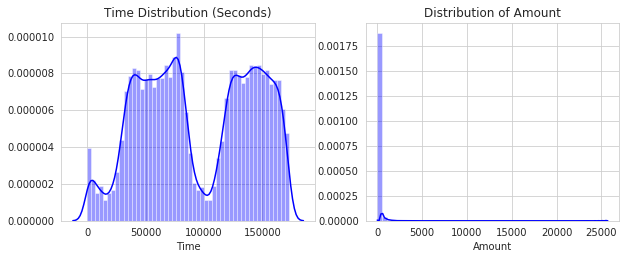

In [74]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

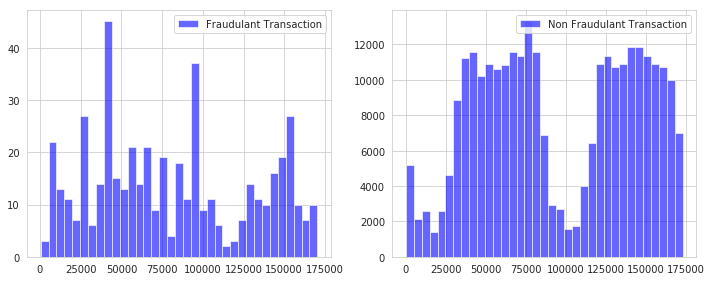

In [75]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

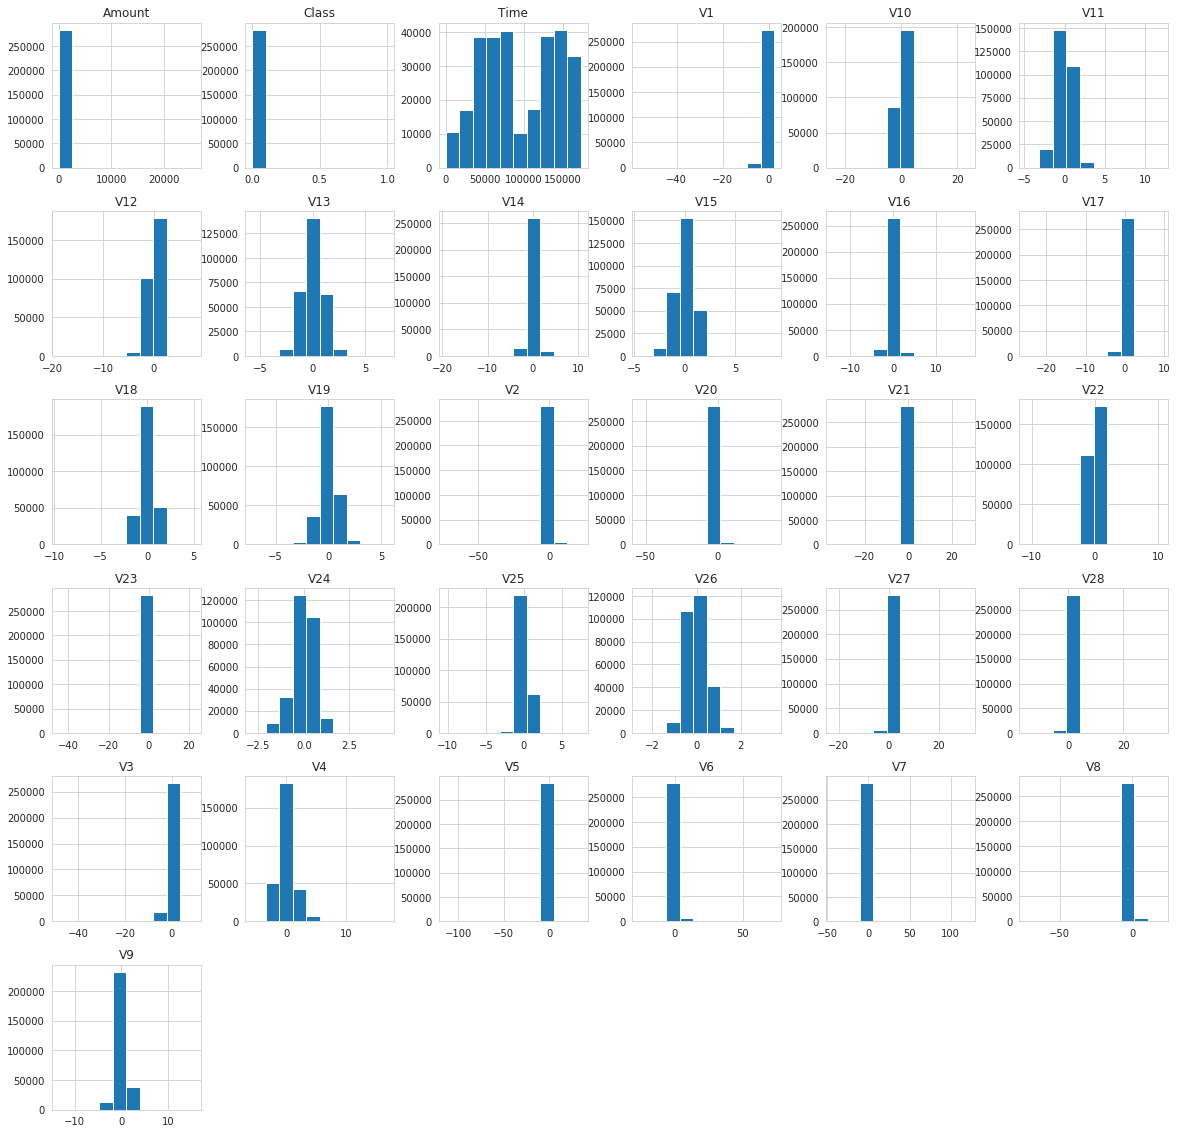

In [76]:
data.hist(figsize=(20, 20));

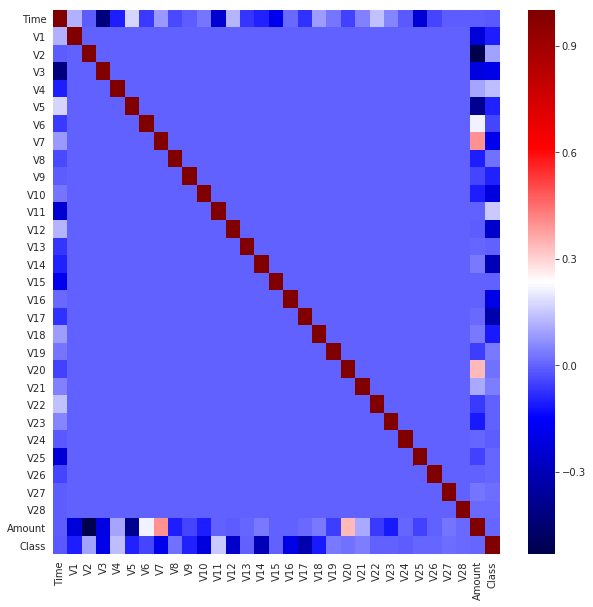

In [77]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

### Highest correlations come from:
    - Time & V3 (-0.42)
    - Amount & V2 (-0.53)
    - Amount & V4 (0.4)

- While these correlations are high, I don't expect it to run the risk of multicollinearity.

- The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

# 3. Data Pre-processing

`Time` and `Amount` should be scaled as the other columns.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [79]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# 4. Model Building
# 4. 1. Artificial Neural Network (ANNs)

In [81]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               7936      
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)              

In [82]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Train on 159491 samples, validate on 39873 samples
Epoch 1/300
159491/159491 [==============================] - 3s 21us/sample - loss: 0.4859 - fn: 56.0000 - fp: 28702.0000 - tn: 130502.0000 - tp: 231.0000 - precision: 0.0080 - recall: 0.8049 - val_loss: 0.1705 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 2/300
159491/159491 [==============================] - 1s 6us/sample - loss: 0.1043 - fn: 74.0000 - fp: 544.0000 - tn: 158660.0000 - tp: 213.0000 - precision: 0.2814 - recall: 0.7422 - val_loss: 0.0355 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_precision: 0.7971 - val_recall: 0.7971
Epoch 3/300
159491/159491 [==============================] - 1s 4us/sample - loss: 0.0363 - fn: 103.0000 - fp: 124.0000 - tn: 159080.0000 - tp: 184.0000 - precision: 0.5974 - recall: 0.6411 - val_loss: 0.0212 - val_fn: 14.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 55.0000 - val_

Epoch 26/300
159491/159491 [==============================] - 1s 4us/sample - loss: 0.0030 - fn: 64.0000 - fp: 24.0000 - tn: 159180.0000 - tp: 223.0000 - precision: 0.9028 - recall: 0.7770 - val_loss: 0.0045 - val_fn: 17.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 52.0000 - val_precision: 0.8966 - val_recall: 0.7536
Epoch 27/300
159491/159491 [==============================] - 1s 4us/sample - loss: 0.0028 - fn: 68.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 219.0000 - precision: 0.9359 - recall: 0.7631 - val_loss: 0.0046 - val_fn: 20.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 49.0000 - val_precision: 0.9074 - val_recall: 0.7101
Epoch 28/300
159491/159491 [==============================] - 1s 4us/sample - loss: 0.0027 - fn: 74.0000 - fp: 21.0000 - tn: 159183.0000 - tp: 213.0000 - precision: 0.9103 - recall: 0.7422 - val_loss: 0.0049 - val_fn: 29.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 40.0000 - val_precision: 0.8889 - val_recall: 0.5797
Epoch 29/300
159491

159491/159491 [==============================] - 1s 4us/sample - loss: 0.0013 - fn: 37.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 250.0000 - precision: 0.9363 - recall: 0.8711 - val_loss: 0.0056 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 77/300
159491/159491 [==============================] - 1s 4us/sample - loss: 0.0010 - fn: 31.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 256.0000 - precision: 0.9517 - recall: 0.8920 - val_loss: 0.0059 - val_fn: 17.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 52.0000 - val_precision: 0.8814 - val_recall: 0.7536
Epoch 78/300
159491/159491 [==============================] - 1s 4us/sample - loss: 0.0011 - fn: 33.0000 - fp: 14.0000 - tn: 159190.0000 - tp: 254.0000 - precision: 0.9478 - recall: 0.8850 - val_loss: 0.0058 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 79/300
159491/159491 [====

Epoch 101/300
159491/159491 [==============================] - 1s 6us/sample - loss: 7.7056e-04 - fn: 24.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 263.0000 - precision: 0.9529 - recall: 0.9164 - val_loss: 0.0057 - val_fn: 16.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 53.0000 - val_precision: 0.9138 - val_recall: 0.7681
Epoch 102/300
159491/159491 [==============================] - 1s 5us/sample - loss: 8.5635e-04 - fn: 28.0000 - fp: 13.0000 - tn: 159191.0000 - tp: 259.0000 - precision: 0.9522 - recall: 0.9024 - val_loss: 0.0058 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 103/300
159491/159491 [==============================] - 1s 4us/sample - loss: 7.9294e-04 - fn: 29.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 258.0000 - precision: 0.9591 - recall: 0.8990 - val_loss: 0.0061 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoc

Epoch 126/300
159491/159491 [==============================] - 1s 4us/sample - loss: 5.2551e-04 - fn: 22.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 265.0000 - precision: 0.9743 - recall: 0.9233 - val_loss: 0.0066 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 55.0000 - val_precision: 0.9167 - val_recall: 0.7971
Epoch 127/300
159491/159491 [==============================] - 1s 5us/sample - loss: 5.7184e-04 - fn: 21.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 266.0000 - precision: 0.9638 - recall: 0.9268 - val_loss: 0.0066 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 128/300
159491/159491 [==============================] - 1s 4us/sample - loss: 4.6659e-04 - fn: 16.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 271.0000 - precision: 0.9713 - recall: 0.9443 - val_loss: 0.0070 - val_fn: 13.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 56.0000 - val_precision: 0.8615 - val_recall: 0.8116
Epoch 

Epoch 151/300
159491/159491 [==============================] - 1s 4us/sample - loss: 5.9819e-04 - fn: 20.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 267.0000 - precision: 0.9604 - recall: 0.9303 - val_loss: 0.0066 - val_fn: 14.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 55.0000 - val_precision: 0.8209 - val_recall: 0.7971
Epoch 152/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.7220e-04 - fn: 9.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 278.0000 - precision: 0.9823 - recall: 0.9686 - val_loss: 0.0061 - val_fn: 15.0000 - val_fp: 4.0000 - val_tn: 39800.0000 - val_tp: 54.0000 - val_precision: 0.9310 - val_recall: 0.7826
Epoch 153/300
159491/159491 [==============================] - 1s 4us/sample - loss: 4.2844e-04 - fn: 15.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 272.0000 - precision: 0.9611 - recall: 0.9477 - val_loss: 0.0065 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch

Epoch 176/300
159491/159491 [==============================] - 1s 4us/sample - loss: 4.1187e-04 - fn: 13.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 274.0000 - precision: 0.9682 - recall: 0.9547 - val_loss: 0.0077 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 177/300
159491/159491 [==============================] - 1s 4us/sample - loss: 4.3533e-04 - fn: 13.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 274.0000 - precision: 0.9716 - recall: 0.9547 - val_loss: 0.0076 - val_fn: 15.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 54.0000 - val_precision: 0.8438 - val_recall: 0.7826
Epoch 178/300
159491/159491 [==============================] - 1s 6us/sample - loss: 4.5785e-04 - fn: 12.0000 - fp: 10.0000 - tn: 159194.0000 - tp: 275.0000 - precision: 0.9649 - recall: 0.9582 - val_loss: 0.0073 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch

Epoch 201/300
159491/159491 [==============================] - 1s 5us/sample - loss: 2.9593e-04 - fn: 12.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 275.0000 - precision: 0.9821 - recall: 0.9582 - val_loss: 0.0086 - val_fn: 14.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 55.0000 - val_precision: 0.8462 - val_recall: 0.7971
Epoch 202/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.2765e-04 - fn: 12.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 275.0000 - precision: 0.9786 - recall: 0.9582 - val_loss: 0.0086 - val_fn: 14.0000 - val_fp: 12.0000 - val_tn: 39792.0000 - val_tp: 55.0000 - val_precision: 0.8209 - val_recall: 0.7971
Epoch 203/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.2758e-04 - fn: 9.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 278.0000 - precision: 0.9789 - recall: 0.9686 - val_loss: 0.0082 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 

Epoch 226/300
159491/159491 [==============================] - 1s 4us/sample - loss: 2.9344e-04 - fn: 8.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 279.0000 - precision: 0.9789 - recall: 0.9721 - val_loss: 0.0080 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 227/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.1822e-04 - fn: 10.0000 - fp: 5.0000 - tn: 159199.0000 - tp: 277.0000 - precision: 0.9823 - recall: 0.9652 - val_loss: 0.0076 - val_fn: 14.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 55.0000 - val_precision: 0.9016 - val_recall: 0.7971
Epoch 228/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.0098e-04 - fn: 9.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 278.0000 - precision: 0.9754 - recall: 0.9686 - val_loss: 0.0080 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 229

Epoch 251/300
159491/159491 [==============================] - 1s 4us/sample - loss: 2.6015e-04 - fn: 9.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 278.0000 - precision: 0.9789 - recall: 0.9686 - val_loss: 0.0076 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 252/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.4657e-04 - fn: 8.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 279.0000 - precision: 0.9688 - recall: 0.9721 - val_loss: 0.0076 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 55.0000 - val_precision: 0.9167 - val_recall: 0.7971
Epoch 253/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.8365e-04 - fn: 14.0000 - fp: 7.0000 - tn: 159197.0000 - tp: 273.0000 - precision: 0.9750 - recall: 0.9512 - val_loss: 0.0074 - val_fn: 15.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 54.0000 - val_precision: 0.8852 - val_recall: 0.7826
Epoch 254

Epoch 276/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.4052e-04 - fn: 12.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 275.0000 - precision: 0.9717 - recall: 0.9582 - val_loss: 0.0080 - val_fn: 15.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 54.0000 - val_precision: 0.8438 - val_recall: 0.7826
Epoch 277/300
159491/159491 [==============================] - 1s 4us/sample - loss: 1.8011e-04 - fn: 5.0000 - fp: 3.0000 - tn: 159201.0000 - tp: 282.0000 - precision: 0.9895 - recall: 0.9826 - val_loss: 0.0082 - val_fn: 14.0000 - val_fp: 10.0000 - val_tn: 39794.0000 - val_tp: 55.0000 - val_precision: 0.8462 - val_recall: 0.7971
Epoch 278/300
159491/159491 [==============================] - 1s 4us/sample - loss: 3.3803e-04 - fn: 9.0000 - fp: 8.0000 - tn: 159196.0000 - tp: 278.0000 - precision: 0.9720 - recall: 0.9686 - val_loss: 0.0081 - val_fn: 14.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 55.0000 - val_precision: 0.9167 - val_recall: 0.7971
Epoch 2

In [83]:
score = model.evaluate(X_test, y_test)
print(score)

85443/85443 [==============================] - 10s 122us/sample - loss: 0.0047 - fn: 26.0000 - fp: 16.0000 - tn: 85291.0000 - tp: 110.0000 - precision: 0.8730 - recall: 0.8088
[0.004723706854455897, 26.0, 16.0, 85291.0, 110.0, 0.8730159, 0.8088235]


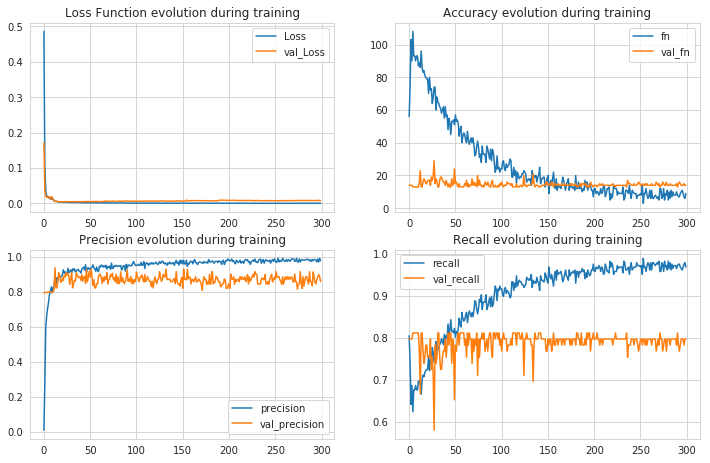

In [84]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [85]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.99      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   0.99      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159202      2]
 [     1    286]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.87      1.00       0.94          1.00
recall        1.00   0.81      1.00       0.90          1.00
f1-score      1.00   0.84      1.00       0.92          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# 4. 2. XGBoost

In [86]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.98      1.00       0.99          1.00
recall         1.00   0.84      1.00       0.92          1.00
f1-score       1.00   0.91      1.00       0.95          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159200      4]
 [    46    241]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

# 4. 3. Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.96          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.93          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# 4. 4. CatBoost

In [88]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.070388
0:	learn: 0.4597542	total: 73.3ms	remaining: 1m 13s
1:	learn: 0.3129054	total: 147ms	remaining: 1m 13s
2:	learn: 0.2124019	total: 223ms	remaining: 1m 14s
3:	learn: 0.1425771	total: 294ms	remaining: 1m 13s
4:	learn: 0.0941945	total: 365ms	remaining: 1m 12s
5:	learn: 0.0642168	total: 436ms	remaining: 1m 12s
6:	learn: 0.0445214	total: 508ms	remaining: 1m 12s
7:	learn: 0.0320400	total: 575ms	remaining: 1m 11s
8:	learn: 0.0237219	total: 644ms	remaining: 1m 10s
9:	learn: 0.0180726	total: 709ms	remaining: 1m 10s
10:	learn: 0.0142287	total: 778ms	remaining: 1m 9s
11:	learn: 0.0114157	total: 848ms	remaining: 1m 9s
12:	learn: 0.0094174	total: 913ms	remaining: 1m 9s
13:	learn: 0.0079424	total: 980ms	remaining: 1m 9s
14:	learn: 0.0069280	total: 1.05s	remaining: 1m 8s
15:	learn: 0.0060589	total: 1.12s	remaining: 1m 8s
16:	learn: 0.0053785	total: 1.19s	remaining: 1m 8s
17:	learn: 0.0049026	total: 1.26s	remaining: 1m 8s
18:	learn: 0.0045010	total: 1.33s	remaining: 1m 8s


159:	learn: 0.0014158	total: 12.2s	remaining: 1m 3s
160:	learn: 0.0014116	total: 12.2s	remaining: 1m 3s
161:	learn: 0.0014042	total: 12.3s	remaining: 1m 3s
162:	learn: 0.0014008	total: 12.4s	remaining: 1m 3s
163:	learn: 0.0013983	total: 12.6s	remaining: 1m 4s
164:	learn: 0.0013943	total: 12.7s	remaining: 1m 4s
165:	learn: 0.0013925	total: 12.8s	remaining: 1m 4s
166:	learn: 0.0013844	total: 13s	remaining: 1m 4s
167:	learn: 0.0013819	total: 13.1s	remaining: 1m 4s
168:	learn: 0.0013784	total: 13.2s	remaining: 1m 4s
169:	learn: 0.0013745	total: 13.3s	remaining: 1m 4s
170:	learn: 0.0013731	total: 13.3s	remaining: 1m 4s
171:	learn: 0.0013626	total: 13.4s	remaining: 1m 4s
172:	learn: 0.0013588	total: 13.5s	remaining: 1m 4s
173:	learn: 0.0013574	total: 13.6s	remaining: 1m 4s
174:	learn: 0.0013531	total: 13.6s	remaining: 1m 4s
175:	learn: 0.0013475	total: 13.7s	remaining: 1m 4s
176:	learn: 0.0013445	total: 13.8s	remaining: 1m 4s
177:	learn: 0.0013404	total: 13.9s	remaining: 1m 3s
178:	learn: 0.

320:	learn: 0.0009308	total: 24.2s	remaining: 51.2s
321:	learn: 0.0009289	total: 24.3s	remaining: 51.1s
322:	learn: 0.0009279	total: 24.3s	remaining: 51s
323:	learn: 0.0009250	total: 24.4s	remaining: 50.9s
324:	learn: 0.0009239	total: 24.5s	remaining: 50.9s
325:	learn: 0.0009231	total: 24.6s	remaining: 50.8s
326:	learn: 0.0009199	total: 24.6s	remaining: 50.7s
327:	learn: 0.0009189	total: 24.7s	remaining: 50.6s
328:	learn: 0.0009169	total: 24.8s	remaining: 50.5s
329:	learn: 0.0009142	total: 24.8s	remaining: 50.4s
330:	learn: 0.0009133	total: 24.9s	remaining: 50.3s
331:	learn: 0.0009112	total: 25s	remaining: 50.2s
332:	learn: 0.0009101	total: 25s	remaining: 50.1s
333:	learn: 0.0009076	total: 25.1s	remaining: 50s
334:	learn: 0.0009068	total: 25.2s	remaining: 50s
335:	learn: 0.0009060	total: 25.2s	remaining: 49.9s
336:	learn: 0.0009027	total: 25.3s	remaining: 49.8s
337:	learn: 0.0009007	total: 25.4s	remaining: 49.7s
338:	learn: 0.0008999	total: 25.5s	remaining: 49.6s
339:	learn: 0.0008990	

479:	learn: 0.0006178	total: 35.5s	remaining: 38.5s
480:	learn: 0.0006172	total: 35.6s	remaining: 38.4s
481:	learn: 0.0006160	total: 35.7s	remaining: 38.3s
482:	learn: 0.0006153	total: 35.7s	remaining: 38.3s
483:	learn: 0.0006145	total: 35.8s	remaining: 38.2s
484:	learn: 0.0006097	total: 35.9s	remaining: 38.1s
485:	learn: 0.0006084	total: 35.9s	remaining: 38s
486:	learn: 0.0006076	total: 36s	remaining: 37.9s
487:	learn: 0.0006055	total: 36.1s	remaining: 37.9s
488:	learn: 0.0006049	total: 36.1s	remaining: 37.8s
489:	learn: 0.0006020	total: 36.2s	remaining: 37.7s
490:	learn: 0.0006013	total: 36.3s	remaining: 37.6s
491:	learn: 0.0005960	total: 36.4s	remaining: 37.5s
492:	learn: 0.0005948	total: 36.4s	remaining: 37.5s
493:	learn: 0.0005929	total: 36.5s	remaining: 37.4s
494:	learn: 0.0005926	total: 36.5s	remaining: 37.3s
495:	learn: 0.0005922	total: 36.6s	remaining: 37.2s
496:	learn: 0.0005894	total: 36.7s	remaining: 37.1s
497:	learn: 0.0005888	total: 36.8s	remaining: 37s
498:	learn: 0.0005

638:	learn: 0.0004276	total: 47.6s	remaining: 26.9s
639:	learn: 0.0004268	total: 47.7s	remaining: 26.8s
640:	learn: 0.0004265	total: 47.7s	remaining: 26.7s
641:	learn: 0.0004262	total: 47.8s	remaining: 26.7s
642:	learn: 0.0004237	total: 47.9s	remaining: 26.6s
643:	learn: 0.0004235	total: 47.9s	remaining: 26.5s
644:	learn: 0.0004228	total: 48s	remaining: 26.4s
645:	learn: 0.0004218	total: 48.1s	remaining: 26.3s
646:	learn: 0.0004215	total: 48.1s	remaining: 26.3s
647:	learn: 0.0004191	total: 48.2s	remaining: 26.2s
648:	learn: 0.0004186	total: 48.3s	remaining: 26.1s
649:	learn: 0.0004184	total: 48.4s	remaining: 26s
650:	learn: 0.0004179	total: 48.4s	remaining: 26s
651:	learn: 0.0004176	total: 48.5s	remaining: 25.9s
652:	learn: 0.0004166	total: 48.6s	remaining: 25.8s
653:	learn: 0.0004146	total: 48.6s	remaining: 25.7s
654:	learn: 0.0004131	total: 48.7s	remaining: 25.7s
655:	learn: 0.0004129	total: 48.8s	remaining: 25.6s
656:	learn: 0.0004126	total: 48.9s	remaining: 25.5s
657:	learn: 0.0004

798:	learn: 0.0002911	total: 59s	remaining: 14.9s
799:	learn: 0.0002910	total: 59.1s	remaining: 14.8s
800:	learn: 0.0002902	total: 59.2s	remaining: 14.7s
801:	learn: 0.0002900	total: 59.2s	remaining: 14.6s
802:	learn: 0.0002893	total: 59.3s	remaining: 14.6s
803:	learn: 0.0002887	total: 59.4s	remaining: 14.5s
804:	learn: 0.0002883	total: 59.4s	remaining: 14.4s
805:	learn: 0.0002867	total: 59.5s	remaining: 14.3s
806:	learn: 0.0002866	total: 59.6s	remaining: 14.2s
807:	learn: 0.0002865	total: 59.6s	remaining: 14.2s
808:	learn: 0.0002855	total: 59.7s	remaining: 14.1s
809:	learn: 0.0002837	total: 59.8s	remaining: 14s
810:	learn: 0.0002833	total: 59.9s	remaining: 13.9s
811:	learn: 0.0002828	total: 59.9s	remaining: 13.9s
812:	learn: 0.0002827	total: 60s	remaining: 13.8s
813:	learn: 0.0002816	total: 1m	remaining: 13.7s
814:	learn: 0.0002815	total: 1m	remaining: 13.7s
815:	learn: 0.0002806	total: 1m	remaining: 13.6s
816:	learn: 0.0002794	total: 1m	remaining: 13.5s
817:	learn: 0.0002792	total: 1

958:	learn: 0.0002105	total: 1m 10s	remaining: 3.01s
959:	learn: 0.0002101	total: 1m 10s	remaining: 2.93s
960:	learn: 0.0002100	total: 1m 10s	remaining: 2.86s
961:	learn: 0.0002095	total: 1m 10s	remaining: 2.79s
962:	learn: 0.0002092	total: 1m 10s	remaining: 2.71s
963:	learn: 0.0002091	total: 1m 10s	remaining: 2.64s
964:	learn: 0.0002086	total: 1m 10s	remaining: 2.57s
965:	learn: 0.0002082	total: 1m 10s	remaining: 2.49s
966:	learn: 0.0002080	total: 1m 10s	remaining: 2.42s
967:	learn: 0.0002077	total: 1m 10s	remaining: 2.35s
968:	learn: 0.0002073	total: 1m 11s	remaining: 2.27s
969:	learn: 0.0002072	total: 1m 11s	remaining: 2.2s
970:	learn: 0.0002058	total: 1m 11s	remaining: 2.13s
971:	learn: 0.0002057	total: 1m 11s	remaining: 2.05s
972:	learn: 0.0002056	total: 1m 11s	remaining: 1.98s
973:	learn: 0.0002053	total: 1m 11s	remaining: 1.9s
974:	learn: 0.0002052	total: 1m 11s	remaining: 1.83s
975:	learn: 0.0002051	total: 1m 11s	remaining: 1.76s
976:	learn: 0.0002049	total: 1m 11s	remaining: 1

In [89]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   0.98      1.00       0.99          1.00
f1-score       1.00   0.99      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     5    282]]

Test Result:
Accuracy Score: 99.97%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.96      1.00       0.98          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.89      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# 4. 5. LigthGBM

In [90]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.86%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.59      1.00       0.80          1.00
recall         1.00   0.69      1.00       0.84          1.00
f1-score       1.00   0.64      1.00       0.82          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159068    136]
 [    89    198]]

Test Result:
Accuracy Score: 99.75%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.35      1.00       0.67          1.00
recall        1.00   0.66      1.00       0.83          1.00
f1-score      1.00   0.46      1.00       0.73          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

# 5. Model Comparaison

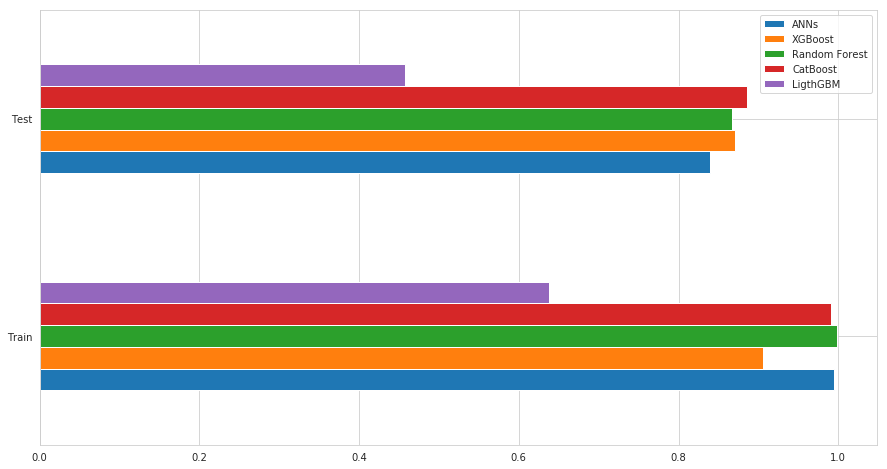

In [91]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))